In [1]:
import pandas as pd

import seaborn as sns

In [2]:
df = pd.read_csv("twitter_training.csv")

In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
a=df.isnull().sum()

a

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

<Axes: >

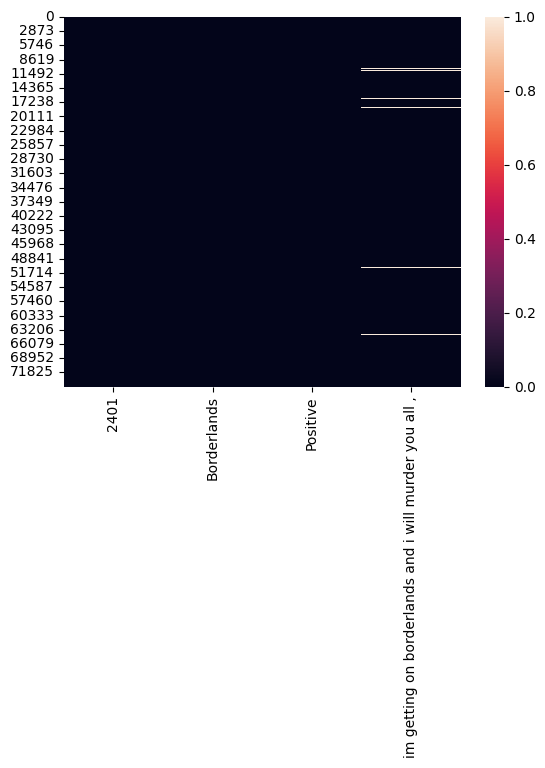

In [5]:
sns.heatmap(df.isna())

In [6]:
import missingno as msno 

<Axes: >

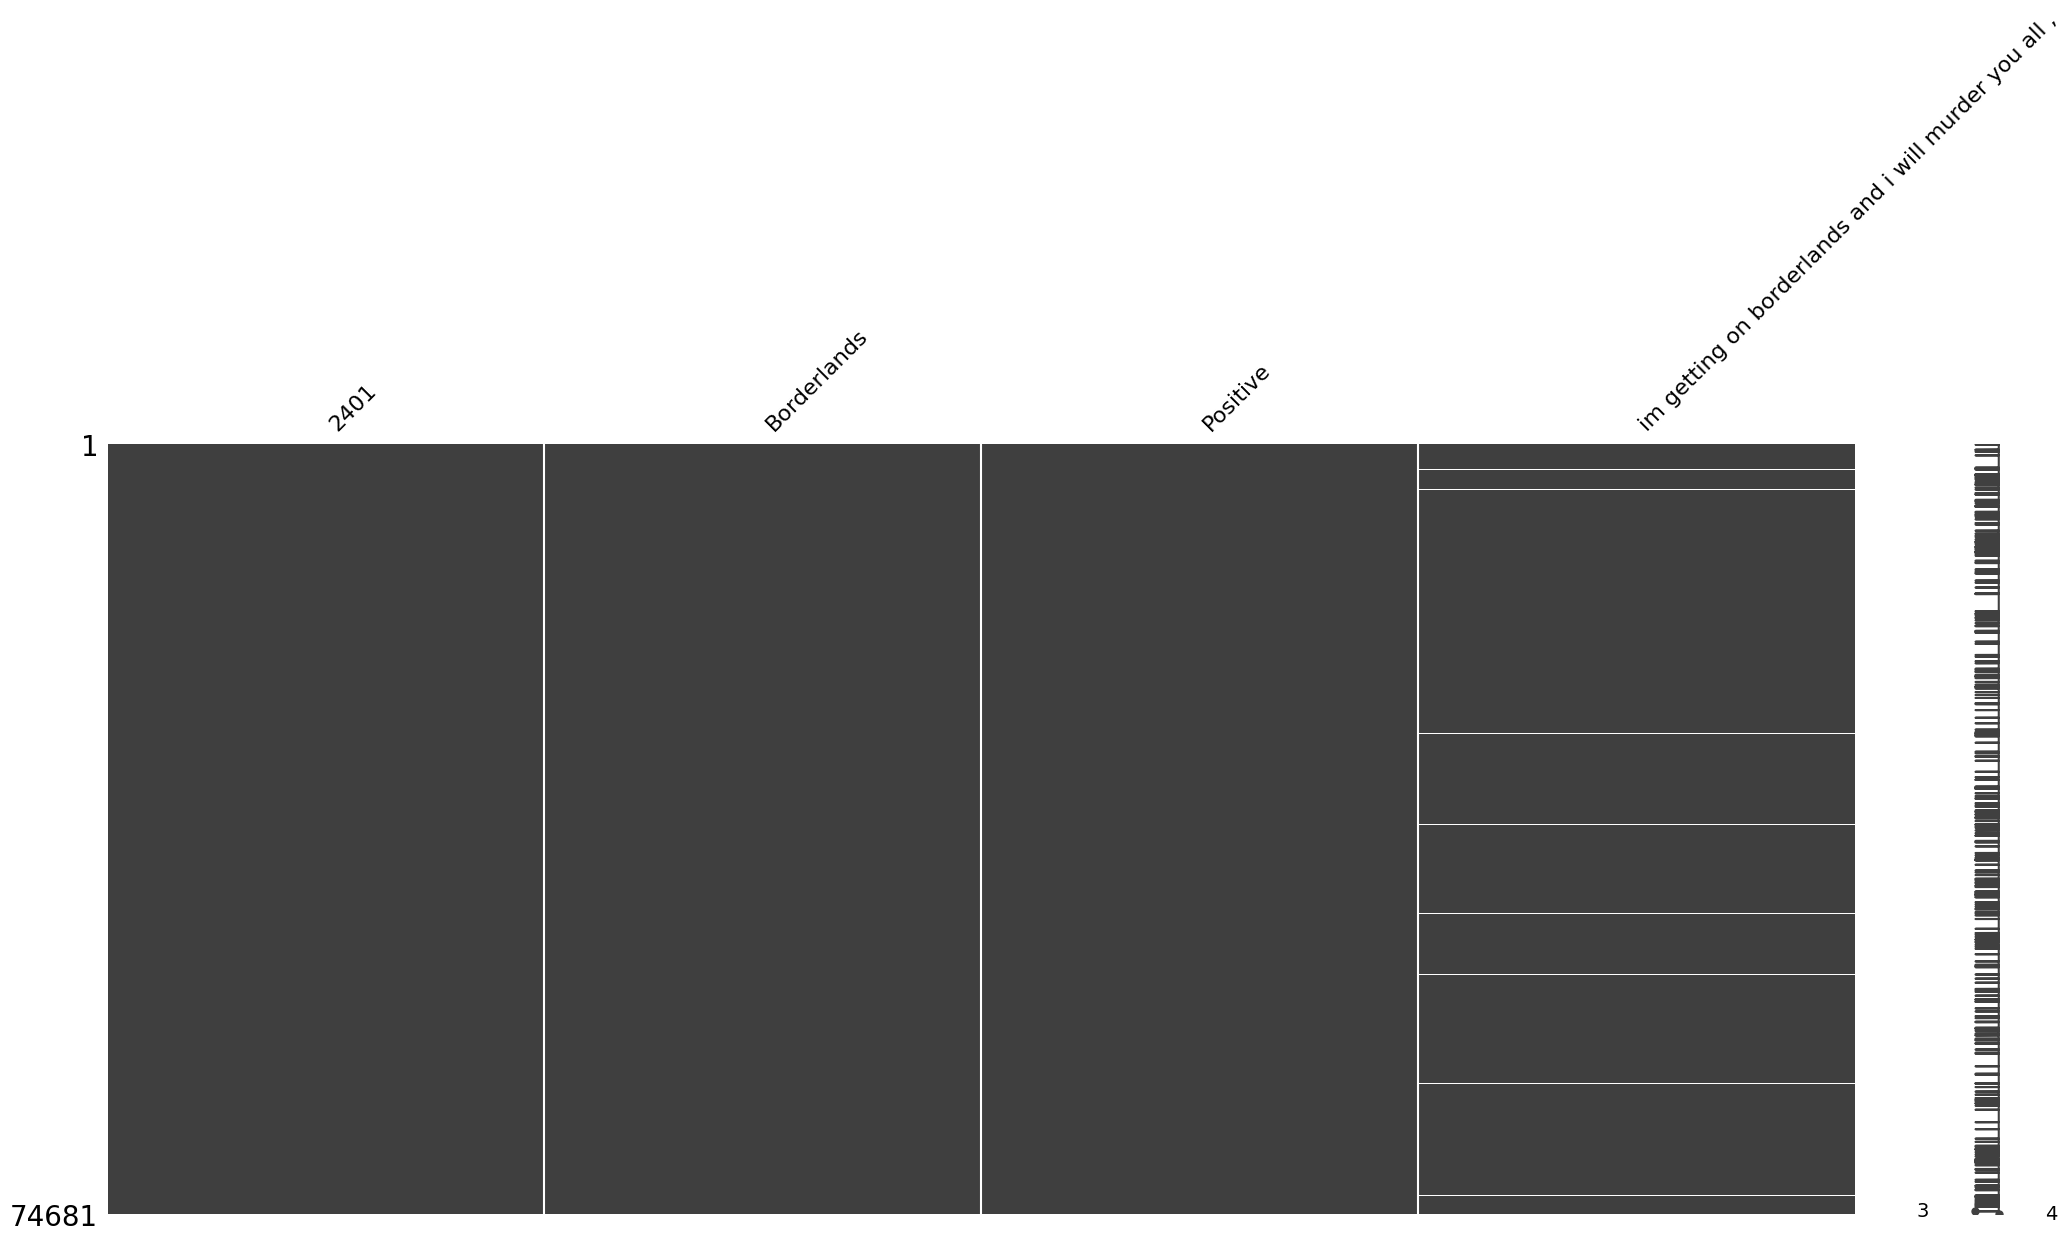

In [7]:
msno.matrix(df)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [10]:
print(df.shape)

(73995, 4)


<Axes: >

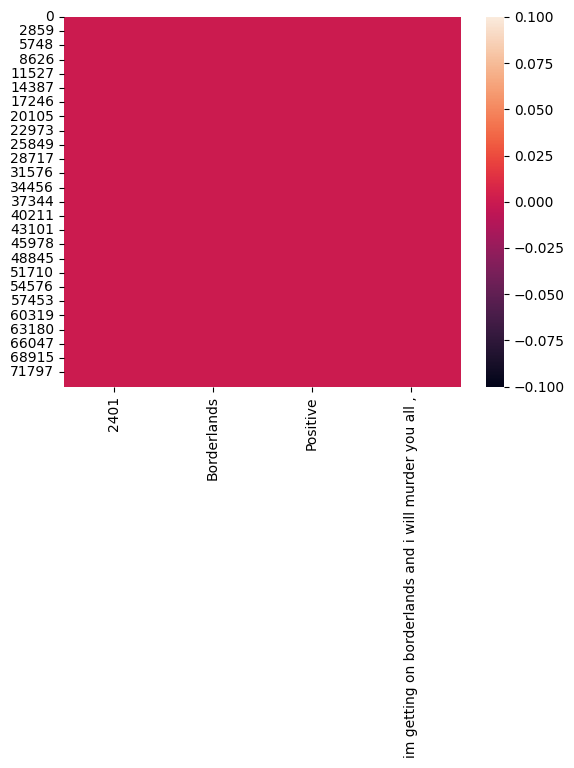

In [11]:
sns.heatmap(df.isna())

In [12]:
df['Positive'].value_counts()


Positive
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [13]:
for idx, row in df.iterrows():
    print(f"{idx+1}: {row['im getting on borderlands and i will murder you all ,']} -> {row['Positive']}")

1: I am coming to the borders and I will kill you all, -> Positive
2: im getting on borderlands and i will kill you all, -> Positive
3: im coming on borderlands and i will murder you all, -> Positive
4: im getting on borderlands 2 and i will murder you me all, -> Positive
5: im getting into borderlands and i can murder you all, -> Positive
6: So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg -> Positive
7: So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg -> Positive
8: So I spent a few hours doing something for f

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
#!pip install spacy


In [15]:
import spacy


In [16]:
#!python -m spacy download en_core_web_sm


In [17]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


In [18]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens) 

In [19]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [20]:
import time

start_time = time.time()
sample_text = "So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg."
preprocess(sample_text)
print(f"Time taken: {time.time() - start_time} seconds")

Time taken: 0.01863408088684082 seconds


In [ ]:
df['Preprocessed Text'] = df['im getting on borderlands and i will murder you all ,'].apply(preprocess)
df.head()

In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [23]:
le_model = LabelEncoder()
df['label'] = le_model.fit_transform(df['Positive'])

/var/folders/33/m2st29wd38j758d0sz_f1m3w0000gn/T/ipykernel_66967/4070854467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = le_model.fit_transform(df['Positive'])


In [24]:
df.head(20)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",Preprocessed Text,label
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill,3
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill,3
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder,3
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder,3
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder,3
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spend hour make fun know HUGE @borderlands fan...,3
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,spend couple hour fun know huge Borderlands fa...,3
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,spend hour fun know HUGE Borderlands fan Maya ...,3
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,spend hour make fun know HUGE RhandlerR fan Ma...,3
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,2010 spend hour make fun know HUGE RhandlerR f...,3


In [25]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",Preprocessed Text,label
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill,3
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill,3
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder,3
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder,3
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder,3


In [26]:
X = df.drop(columns=['label'])
y = df['label']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=df['label'])

In [29]:
print(X.columns)



Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,',
       'Preprocessed Text'],
      dtype='object')


In [30]:
print(y.name)

label


In [31]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (59196, 5)
Shape of X_test:  (14799, 5)


In [32]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (59196, 5)
Shape of y_train:  (59196,)
Shape of X_test:  (14799, 5)
Shape of y_test:  (14799,)


In [33]:
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))         
])

In [34]:
clf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [5, 59196]